In [2]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [3]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [4]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [5]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [6]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.3216012119642939, 0.6029004849746546],
 'diameter': 62.01579715197982,
 'confidence': 0.9192227721214294,
 'timestamp': 569203.979529,
 'sphere': {'center': [3.376417911631797,
   -0.5346845531594694,
   40.29510161455846],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [119.5725006389022, 92.17180688340537],
  'axes': [174.8371959217031, 174.8371959217031],
  'angle': 0.0},
 'circle_3d': {'center': [-3.4687119958963755,
   -2.1228615062052603,
   32.63860825827077],
  'normal': [-0.6586729324582248, -0.15282239856029114, -0.7367464167168798],
  'radius': 3.1557139831189303},
 'diameter_3d': 6.3114279662378605,
 'ellipse': {'center': [61.74743269714443, 76.24310688486631],
  'axes': [45.035206738271675, 62.01579715197982],
  'angle': 14.715842237376705},
 'location': [61.74743269714443, 76.24310688486631],
 'model_confidence': 1.0,
 'theta': 1.7242199185189568,
 'phi': -2.30030292590

Text(0.5, 0, 'Pupil timestamp (s)')

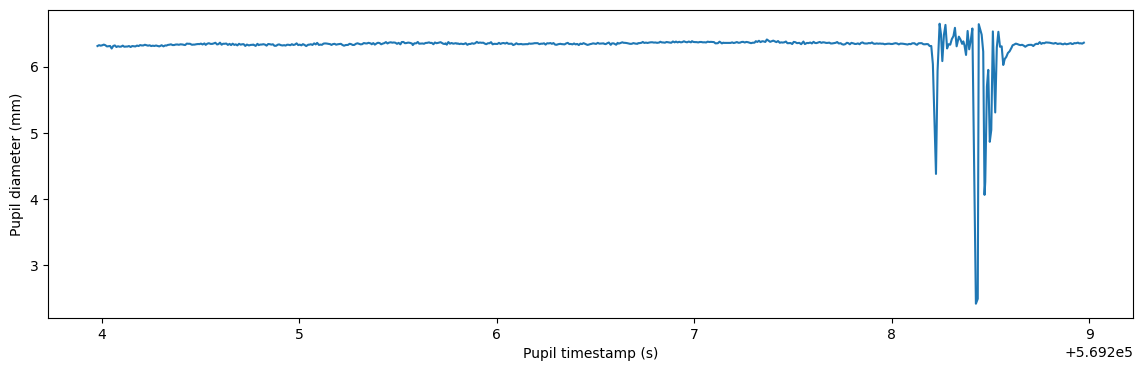

In [7]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')